<a href="https://colab.research.google.com/github/acse-srm3018/mmm_miniclip/blob/main/part1_Media_Mix_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Media Mix Modeling- Part 1

## Miniclip Data Science Challenge

***
Raha Moosavi-August 2023

## Imports

Import the required libraries for df preprocessing and modeling stage.

In [2]:
%pylab inline
import pandas as pd # for manipulating tabular df
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality
import statsmodels.api as sm
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [18]:
# read the road df from the csv file into a pandas dfframe
df= pd.read_csv("/content/gdrive/MyDrive/task_data.csv")

In [6]:
# view the first 5 rows of the road df tabel along with the columns names
df.head()

,Date,Game,Media_Channel,Cost,Daily_Total_Revenue,Daily_Total_Installs
0,2014-01-01,8_ball_pool,Facebook,5811.971341,13506.747631,1832
1,2014-01-02,8_ball_pool,Facebook,5020.698090,14715.633379,1798
2,2014-01-03,8_ball_pool,Facebook,4843.558951,8508.651408,1733
3,2014-01-04,8_ball_pool,Facebook,4758.522846,12131.809124,1669
4,2014-01-05,8_ball_pool,Facebook,6032.254445,11261.778533,1875


## 1.3 Dimensions and features

In [7]:
# number of rows and columns in road df
df.shape

(17532, 6)

In [8]:
# road df column names
df.columns

Index(['Date', 'Game', 'Media_Channel', 'Cost', 'Daily_Total_Revenue',
       'Daily_Total_Installs'],
      dtype='object')

## 1.4 df types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17532 entries, 0 to 17531
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  17532 non-null  object 
 1   Game                  17532 non-null  object 
 2   Media_Channel         17532 non-null  object 
 3   Cost                  17532 non-null  float64
 4   Daily_Total_Revenue   17532 non-null  float64
 5   Daily_Total_Installs  17532 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 821.9+ KB


## 1.5 How many missing values do we have in each column?

In [10]:
# .isna() is used to calculate whether the values in moving df are NaN or not
# .sum() is then used to calculate how many NaN values are present in each column
# .sort_values(ascending=False) is then used to order the columns according to how many missing values are present
missing = df.isna().sum().sort_values(ascending=False)
missing.head(10)

Date                    0
Game                    0
Media_Channel           0
Cost                    0
Daily_Total_Revenue     0
Daily_Total_Installs    0
dtype: int64

## 1.6 How many duplicate values do we have?

In [11]:
# how many missing values do we have from purely numerical features
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()

## Step 3: df Preprocessing


In [68]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

## Step 4: Feature Engineering
 any additional features like lag variables, moving averages, or seasonal indicators can be added here.


## Step 5: Build Media Mix Model

In [70]:
# Split the dfset into features (X) and target (y)
X = df[['Cost', 'Daily_Total_Installs']]
y = df['Daily_Total_Revenue']

# Add a constant column for the intercept in the regression model
X = sm.add_constant(X)

# Fit the Media Mix Model (using Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily_Total_Revenue   R-squared:                       0.781
Model:                             OLS   Adj. R-squared:                  0.781
Method:                  Least Squares   F-statistic:                 3.127e+04
Date:                 Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                         17:52:14   Log-Likelihood:            -1.6526e+05
No. Observations:                17532   AIC:                         3.305e+05
Df Residuals:                    17529   BIC:                         3.305e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [82]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'df' is your DataFrame with relevant data
X = df[['Cost']]
Y_installs = df['Daily_Total_Installs']
Y_revenue = df['Daily_Total_Revenue']

# Add a constant column for the intercept in the regression model
X = sm.add_constant(X)

# Fit the model for Daily_Total_Installs
model_installs = sm.OLS(Y_installs, X).fit()

# Fit the model for Daily_Total_Revenue
model_revenue = sm.OLS(Y_revenue, X).fit()

# Print model summaries
print("Model Summary for Daily_Total_Installs:")
print(model_installs.summary())

print("\nModel Summary for Daily_Total_Revenue:")
print(model_revenue.summary())

Model Summary for Daily_Total_Installs:
                             OLS Regression Results                             
Dep. Variable:     Daily_Total_Installs   R-squared:                       0.082
Model:                              OLS   Adj. R-squared:                  0.082
Method:                   Least Squares   F-statistic:                     1557.
Date:                  Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                          18:30:06   Log-Likelihood:            -1.4354e+05
No. Observations:                 17532   AIC:                         2.871e+05
Df Residuals:                     17530   BIC:                         2.871e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Step 7: Model Evaluation
Evaluate the model using appropriate metrics

In [23]:
# R-squared
r2 = model.rsquared
print("R-squared:", r2)

# Mean Absolute Error (MAE)
mae = (abs(model.resid)).mean()
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = (model.resid ** 2).mean()
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = (abs(model.resid) / y).mean() * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# AIC and BIC
aic = model.aic
bic = model.bic
print("AIC:", aic)
print("BIC:", bic)

R-squared: 0.781060461216334
Mean Absolute Error (MAE): 2221.043903029866
Mean Squared Error (MSE): 9011078.237313878
Root Mean Squared Error (RMSE): 3001.8458050529307
Mean Absolute Percentage Error (MAPE): 16.52053399241807
AIC: 330516.5002557278
BIC: 330539.8156049124


Based on the provided model summaries for Daily_Total_Installs and Daily_Total_Revenue, we can interpret the results as follows:

**Model Summary for Daily_Total_Installs:**
- R-squared: The R-squared value of 0.082 indicates that around 8.2% of the variability in Daily_Total_Installs can be explained by the independent variable (Cost) in the model.
- Coefficients: The coefficient of 'Cost' is 0.1936, which implies that for every unit increase in marketing 'Cost', the 'Daily_Total_Installs' is expected to increase by 0.1936 units.
- P-value: The p-value for the 'Cost' coefficient is 0.000, indicating that it is statistically significant at the 0.05 significance level.
- Intercept: The intercept (const) term is 1160.5105, representing the expected Daily_Total_Installs when the 'Cost' is zero.

**Model Summary for Daily_Total_Revenue:**
- R-squared: The R-squared value of 0.021 indicates that around 2.1% of the variability in Daily_Total_Revenue can be explained by the independent variable (Cost) in the model.
- Coefficients: The coefficient of 'Cost' is 0.7009, which implies that for every unit increase in marketing 'Cost', the 'Daily_Total_Revenue' is expected to increase by 0.7009 units.
- P-value: The p-value for the 'Cost' coefficient is 0.000, indicating that it is statistically significant at the 0.05 significance level.
- Intercept: The intercept (const) term is 11850.0, representing the expected Daily_Total_Revenue when the 'Cost' is zero.

Interpretation:
- Both models have statistically significant coefficients for 'Cost', indicating that marketing spend (Cost) has a significant impact on both Daily_Total_Installs and Daily_Total_Revenue.
- However, the R-squared values are relatively low, indicating that there is still a considerable amount of variability in the response variables that is not explained by the 'Cost' variable alone.
- The condition number (Cond. No.) being large suggests the possibility of strong multicollinearity between the independent variables, which might affect the stability of the coefficients.

Additional Considerations:
- Outliers: Check for outliers in the data that might be influencing the model's fit and remove or handle them appropriately.

Overall, the models provide initial insights into the relationship between marketing investments and key performance metrics. Further analysis and refinement of the models can be done based on additional data exploration and domain knowledge.

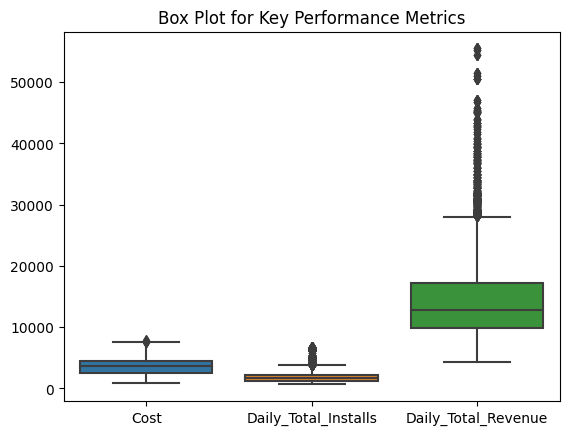

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with relevant data
sns.boxplot(data=df[['Cost', 'Daily_Total_Installs', 'Daily_Total_Revenue']])
plt.title('Box Plot for Key Performance Metrics')
plt.show()

In [19]:
# Calculate Z-scores for each variable
z_scores = stats.zscore(df[['Cost', 'Daily_Total_Installs', 'Daily_Total_Revenue']])

# Define the Z-score threshold for outlier detection (e.g., ±3)
threshold = 3

# Identify outliers based on Z-scores
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print the outliers
df[outliers].head()

             Date            Game Media_Channel         Cost  \
917    2016-07-06     8_ball_pool      Facebook  5220.726081   
920    2016-07-09     8_ball_pool      Facebook  4471.088835   
943    2016-08-01     8_ball_pool      Facebook  4609.774626   
944    2016-08-02     8_ball_pool      Facebook  6032.622480   
945    2016-08-03     8_ball_pool      Facebook  5045.878244   
...           ...             ...           ...          ...   
17052  2016-09-08  baseball_clash    IronSource  6023.693939   
17053  2016-09-09  baseball_clash    IronSource  5469.855382   
17055  2016-09-11  baseball_clash    IronSource  4971.679390   
17058  2016-09-14  baseball_clash    IronSource  4861.880614   
17071  2016-09-27  baseball_clash    IronSource  5294.089975   

       Daily_Total_Revenue  Daily_Total_Installs  
917           33915.337761                  4387  
920           33665.100062                  4297  
943           39310.777980                  4821  
944           37984.030555 

## Step 8: Forecasting
Use the trained model for forecasting future daily revenue based on projected media spend.

In [73]:
# Step 1: Predict Revenue based on different media spends for each channel
df['Predicted_Revenue'] = model.predict(sm.add_constant(df[['Cost', 'Daily_Total_Installs']]))

# Step 2: Set Budget Constraints
budget_constraints = {
    'Facebook': 5000,   # Example budget constraint for Facebook
    'Google': 7000,     # Example budget constraint for Google
    # Add other channel budget constraints as needed
}

# Step 3: Budget Allocation
df['Allocated_Budget'] = 0  # Initialize allocated budget column

for channel in df['Media_Channel'].unique():
    channel_mask = df['Media_Channel'] == channel
    total_revenue = df[channel_mask]['Predicted_Revenue'].sum()

    if channel in budget_constraints:
        allocated_budget = min(budget_constraints[channel], total_revenue)
    else:
        allocated_budget = total_revenue

    df.loc[channel_mask, 'Allocated_Budget'] = allocated_budget


# Print the final budget allocation for each channel
print(df.groupby('Media_Channel')['Allocated_Budget'].sum())


Media_Channel
Facebook      2.191500e+07
Google_Ads    2.924302e+11
IronSource    2.611905e+11
Unity         2.784065e+11
Name: Allocated_Budget, dtype: float64


## Step 9: Visualization and Reporting
Visualize the results and insights from the model using charts, graphs, and other visualizations.

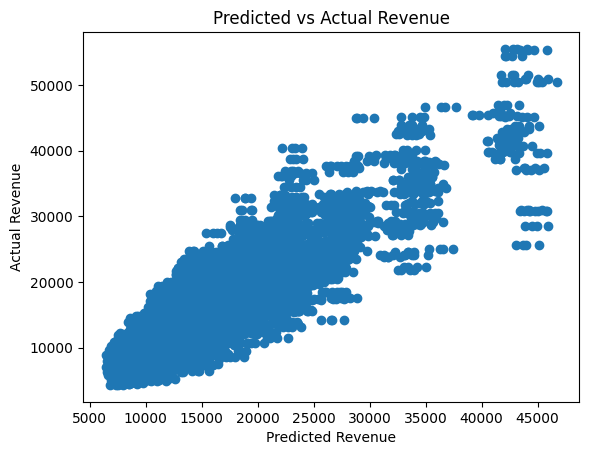

In [22]:
plt.scatter(model.fittedvalues, y)
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Predicted vs Actual Revenue')
plt.show()

# step 9. ROAS
Calculate Return on Advertising Spend (ROAS) for each media channel.

In [21]:
# read the road df from the csv file into a pandas dfframe
df= pd.read_csv("/content/gdrive/MyDrive/task_data.csv")
df['RPI'] = df['Daily_Total_Revenue'] / df['Daily_Total_Installs']
df['ROAS'] = (df['Daily_Total_Revenue'] - df['Cost']) / df['Cost']

# Aggregate ROAS by Media_Channel and Date
media_channel_roas = df.groupby(['Media_Channel', 'Date'])['ROAS'].sum().reset_index()

# Aggregate ROAS by Media_Channel
aggregate_roas = media_channel_roas.groupby('Media_Channel')['ROAS'].mean()

print(aggregate_roas)

Media_Channel
Facebook       8.126121
Google_Ads    19.166945
IronSource     5.763081
Unity         10.244259
Name: ROAS, dtype: float64


In [22]:
# Calculate correlation coefficients
correlation_matrix = df[["ROAS", "Cost", "Daily_Total_Installs", "Daily_Total_Revenue"]].corr()

# Display the correlation matrix
correlation_matrix.head()

,ROAS,Cost,Daily_Total_Installs,Daily_Total_Revenue
ROAS,1.000000,-0.578998,0.420877,0.620579
Cost,-0.578998,1.000000,0.285615,0.146299
Daily_Total_Installs,0.420877,0.285615,1.000000,0.877062
Daily_Total_Revenue,0.620579,0.146299,0.877062,1.000000


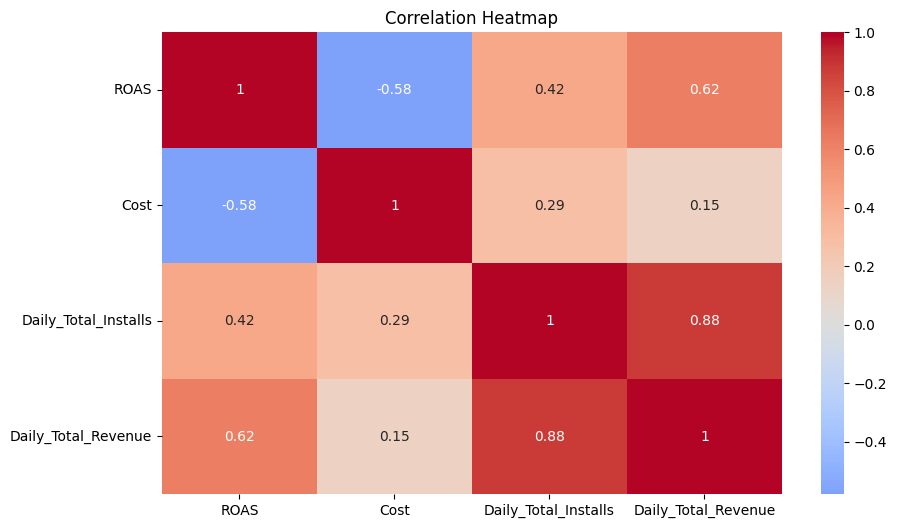

In [15]:
# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

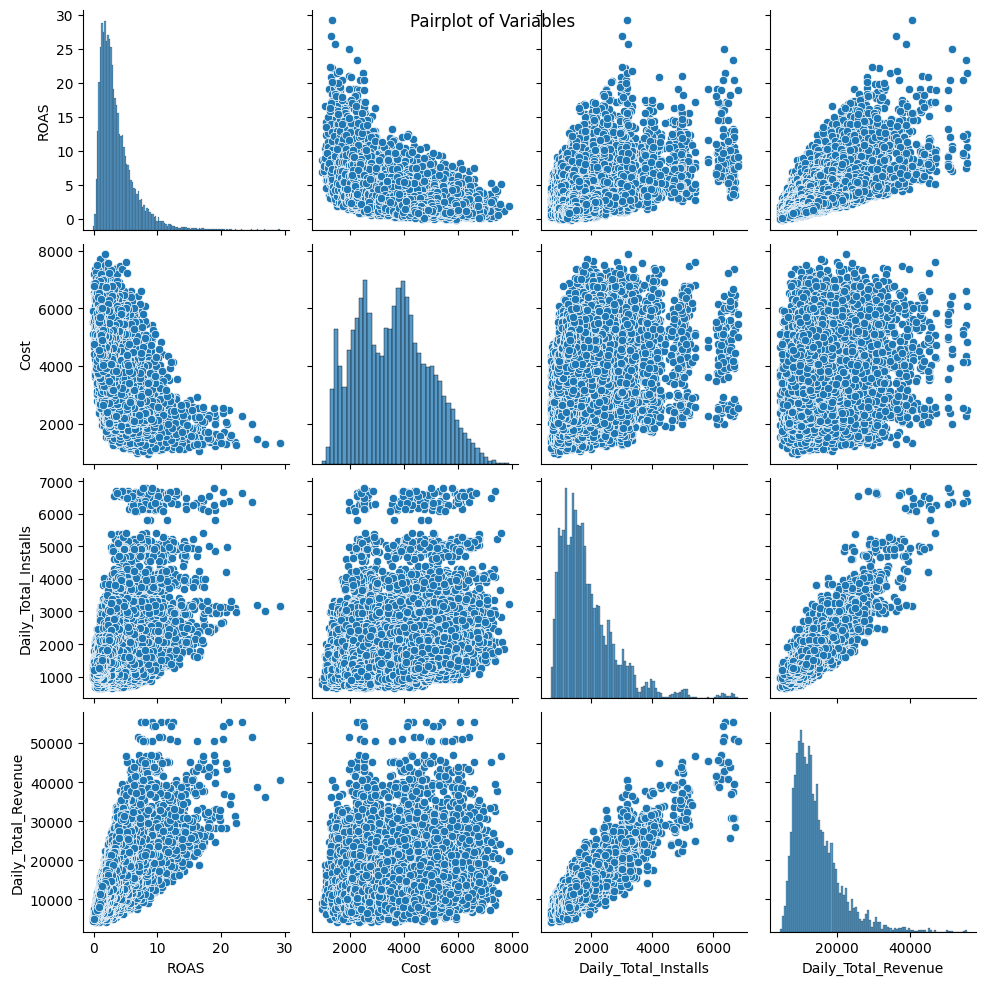

In [16]:
# Create a pairplot
sns.pairplot(df, vars=["ROAS", "Cost", "Daily_Total_Installs", "Daily_Total_Revenue"])
plt.suptitle("Pairplot of Variables")
plt.show()

<ipython-input-23-45b47c3a06a5>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channel_resampled = df.groupby('Media_Channel').resample('M').mean()
<ipython-input-23-45b47c3a06a5>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channel_resampled = df.groupby('Media_Channel').resample('M').mean()
<ipython-input-23-45b47c3a06a5>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channel_resampled = df.groupby('Media

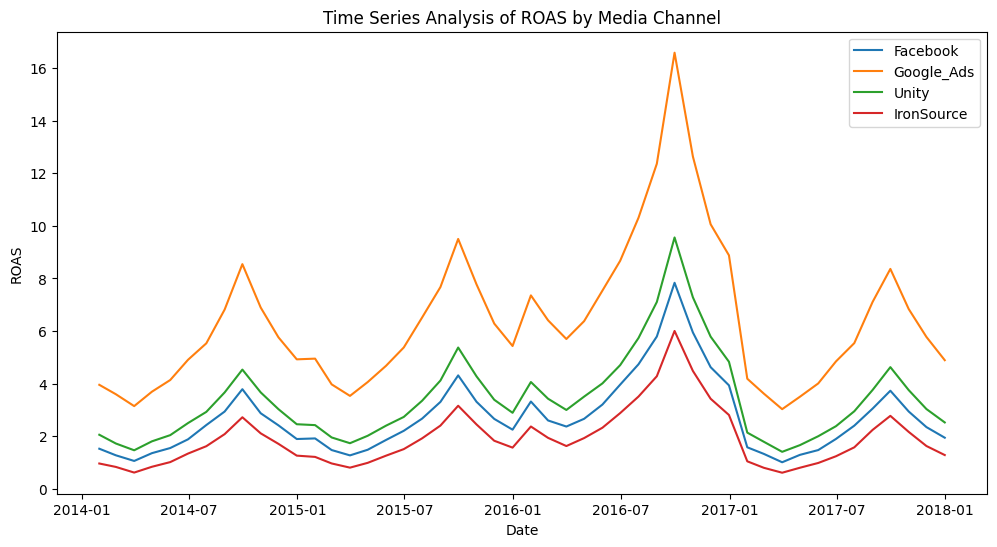

In [23]:
# read the road df from the csv file into a pandas dfframe
df= pd.read_csv("/content/gdrive/MyDrive/task_data.csv")

# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate Revenue per Install (RPI) and Return on Advertising Spend (ROAS)
df["RPI"] = df["Daily_Total_Revenue"] / df["Daily_Total_Installs"]
df["ROAS"] = (df["Daily_Total_Revenue"] - df["Cost"]) / df["Cost"]

# Group data by Media_Channel and resample by a specific time frequency (e.g., monthly)
channel_resampled = df.groupby('Media_Channel').resample('M').mean()

# Plot time series for each media channel
plt.figure(figsize=(12, 6))

for channel in df['Media_Channel'].unique():
    plt.plot(channel_resampled.loc[channel]['ROAS'], label=channel)

plt.title('Time Series Analysis of ROAS by Media Channel')
plt.xlabel('Date')
plt.ylabel('ROAS')
plt.legend()
plt.show()
